### What if I had a longer canyon instead of a chubby one?

Reviewer 2 form JPO asked about the impact of having a Barkley like cancyon, which is chubby intead of long unlike many shelf canyons.

I ran experiments with a longer canyon, asking for same width and radius of curvature but those changed a bit.




In [1]:
import cmocean as cmo
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gspec
%matplotlib inline
from netCDF4 import Dataset
import numpy as np
import os
import pandas as pd
import seaborn as sns
import sys
import warnings
warnings.filterwarnings("ignore")
import xarray as xr
import canyon_tools.readout_tools as rout 
import canyon_tools.metrics_tools as mpt

/home/kramosmu/anaconda3/lib/python3.5/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [112]:
GridBar='/data/kramosmu/results/TracerExperiments/CNTDIFF/run38/gridGlob.nc'
GridBarOut = Dataset(GridBar)
gridBar = xr.open_dataset(GridBar)

GridNoC='/data/kramosmu/results/TracerExperiments/CNTDIFF/run68/gridGlob.nc'
GridOutNoC = Dataset(GridNoC)

StateBar='/data/kramosmu/results/TracerExperiments/CNTDIFF/run38/stateGlob.nc'
StateBarOut = Dataset(StateBar)
staBar = xr.open_dataset(StateBar)

PtracBar='/data/kramosmu/results/TracerExperiments/CNTDIFF/run38/ptracersGlob.nc'
PtracBarOut = Dataset(PtracBar)
ptrBar = xr.open_dataset(PtracBar)

GridLon='/data/kramosmu/results/TracerExperiments/LONGER_CNY/run01/gridGlob.nc'
GridLonOut = Dataset(GridLon)

StateLon='/data/kramosmu/results/TracerExperiments/LONGER_CNY/run01/stateGlob.nc'
StateLonOut = Dataset(StateLon)
staLon = xr.open_dataset(StateLon)

PtracLon='/data/kramosmu/results/TracerExperiments/LONGER_CNY/run01/ptracersGlob.nc'
PtracLonOut = Dataset(PtracLon)
ptrLon = xr.open_dataset(PtracLon)

StateLon2='/data/kramosmu/results/TracerExperiments/LONGER_CNY2/run01/stateGlob.nc'
StateLon2Out = Dataset(StateLon2)
staLon2 = xr.open_dataset(StateLon2)

# Grid variables
nx = 616
ny = 360
nz = 90
nt = 19 # t dimension size 
time = StateBarOut.variables['T']
rA = GridBarOut.variables['rA']

### Tracer concentration

Text(0.5,1,'depth = -147.5 m')

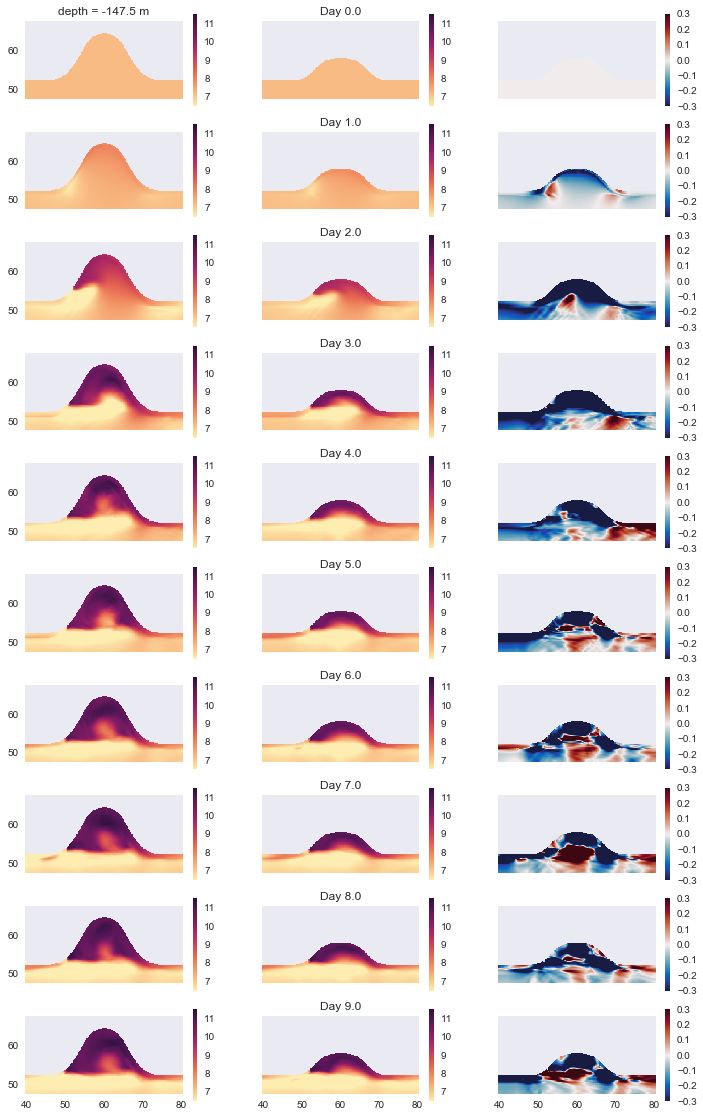

In [5]:
y_slice = slice(200,300)
x_slice = slice(80,280)
zlev = 29

fig,ax = plt.subplots(10,3, figsize=(12,20), sharey=True, sharex = True)

for ii in range(10):
    
    tt = ii*2
    
    long_tr1 = np.ma.masked_equal(ptrLon.Tr1.isel(Y=y_slice, X=x_slice, Z=zlev, T=tt), 0.0)
    bark_tr1 = np.ma.masked_equal(ptrBar.Tr1.isel(Y=y_slice, X=x_slice, Z=zlev, T=tt), 0.0)
    X = ptrBar.X.isel(X=x_slice)/1000
    Y = ptrBar.Y.isel(Y=y_slice)/1000
    
    pc0 = ax[ii,0].pcolor(X,Y,long_tr1, vmax=11.5, vmin=6.5, cmap=cmo.cm.matter)
    plt.colorbar(pc0
                 , ax=ax[ii,0])
    pc1 = ax[ii,1].pcolor(X,Y,bark_tr1, vmax=11.5, vmin=6.5, cmap=cmo.cm.matter)
    plt.colorbar(pc1, ax=ax[ii,1])
    pc2 = ax[ii,2].pcolor(X,Y,long_tr1-bark_tr1, vmax=0.3, vmin=-0.3, cmap=cmo.cm.balance)
    plt.colorbar(pc2, ax=ax[ii,2])
    
    ax[ii,1].set_title('Day %0.1f' %(tt/2.0))
    ax[ii,0].set_aspect(1)
    ax[ii,1].set_aspect(1)
    ax[ii,2].set_aspect(1)
    
ax[0,0].set_title('depth = %1.1f m' %(ptrLon.Z.isel(Z=zlev)))

Text(0.5,1,'depth = -112.5 m')

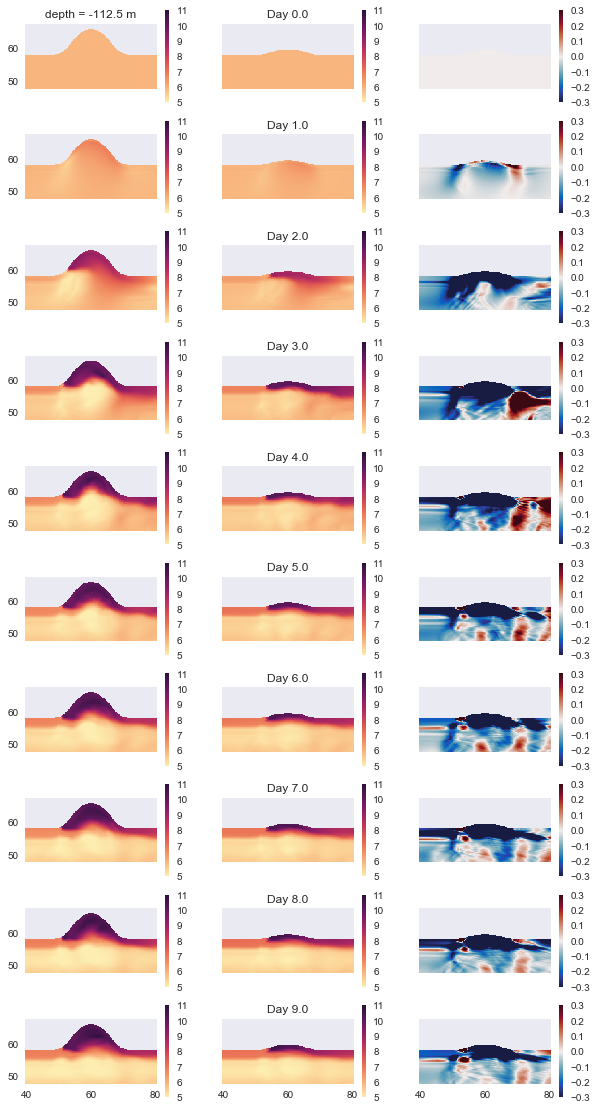

In [6]:
y_slice = slice(200,300)
x_slice = slice(80,280)
zlev = 22

fig,ax = plt.subplots(10,3, figsize=(10,20), sharey=True, sharex = True)

for ii in range(10):
    
    tt = ii*2
    
    long_tr1 = np.ma.masked_equal(ptrLon.Tr1.isel(Y=y_slice, X=x_slice, Z=zlev, T=tt), 0.0)
    bark_tr1 = np.ma.masked_equal(ptrBar.Tr1.isel(Y=y_slice, X=x_slice, Z=zlev, T=tt), 0.0)
    X = ptrBar.X.isel(X=x_slice)/1000
    Y = ptrBar.Y.isel(Y=y_slice)/1000
    
    pc0 = ax[ii,0].pcolor(X,Y,long_tr1, vmax=11, vmin=5.0, cmap=cmo.cm.matter)
    plt.colorbar(pc0
                 , ax=ax[ii,0])
    pc1 = ax[ii,1].pcolor(X,Y,bark_tr1, vmax=11, vmin=5.0, cmap=cmo.cm.matter)
    plt.colorbar(pc1, ax=ax[ii,1])
    pc2 = ax[ii,2].pcolor(X,Y,long_tr1-bark_tr1, vmax=0.3, vmin=-0.3, cmap=cmo.cm.balance)
    plt.colorbar(pc2, ax=ax[ii,2])
    
    ax[ii,1].set_title('Day %0.1f' %(tt/2.0))
    ax[ii,0].set_aspect(1)
    ax[ii,1].set_aspect(1)
    ax[ii,2].set_aspect(1)
    
ax[0,0].set_title('depth = %1.1f m' %(ptrLon.Z.isel(Z=zlev)))

#### Cross-shelf section, tracer concentration

Text(0.5,1,'alongshore dist = 62.6 km')

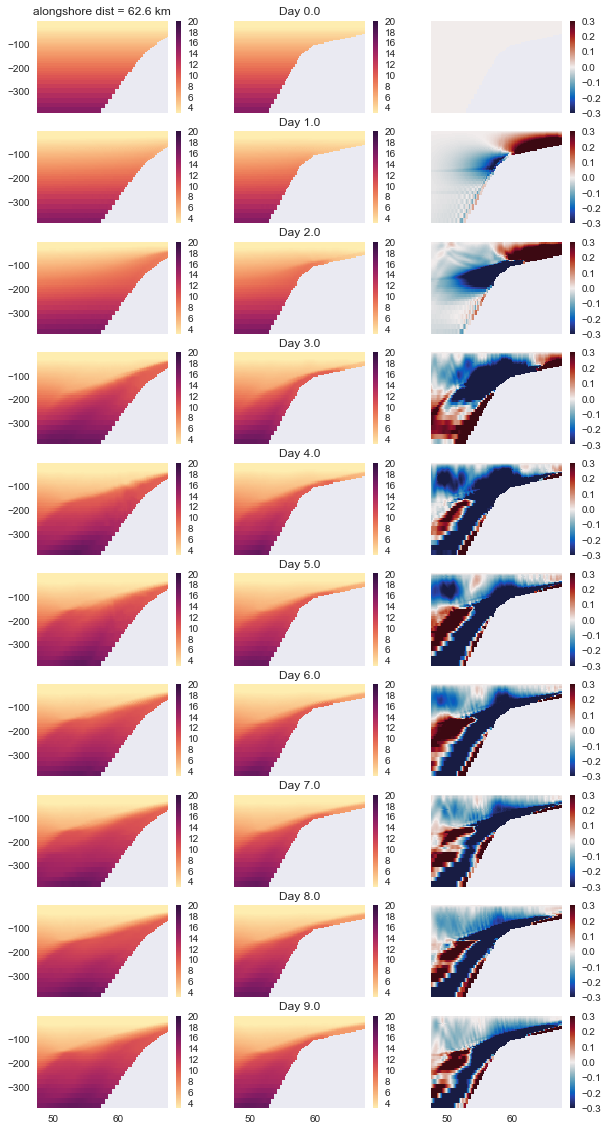

In [7]:
y_slice = slice(200,300)
x_ind = 200
z_slice = slice(0,50)

fig,ax = plt.subplots(10,3, figsize=(10,20), sharey=True, sharex = True)

for ii in range(10):
    
    tt = ii*2
    
    long_tr1 = np.ma.masked_equal(ptrLon.Tr1.isel(Y=y_slice, X=x_ind, Z=z_slice, T=tt), 0.0)
    bark_tr1 = np.ma.masked_equal(ptrBar.Tr1.isel(Y=y_slice, X=x_ind, Z=z_slice, T=tt), 0.0)
    X = ptrBar.X.isel(X=x_ind)/1000
    Y = ptrBar.Y.isel(Y=y_slice)/1000
    Z = ptrBar.Z.isel(Z=z_slice)
    
    pc0 = ax[ii,0].pcolor(Y,Z,long_tr1, vmax=20, vmin=3.0, cmap=cmo.cm.matter)
    plt.colorbar(pc0, ax=ax[ii,0])
    pc1 = ax[ii,1].pcolor(Y,Z,bark_tr1, vmax=20, vmin=3.0, cmap=cmo.cm.matter)
    plt.colorbar(pc1, ax=ax[ii,1])
    pc2 = ax[ii,2].pcolor(Y,Z,long_tr1-bark_tr1, vmax=0.3, vmin=-0.3, cmap=cmo.cm.balance)
    plt.colorbar(pc2, ax=ax[ii,2])
    
    ax[ii,1].set_title('Day %0.1f' %(tt/2.0))
    
ax[0,0].set_title('alongshore dist = %1.1f km' %(ptrLon.X.isel(X=x_ind)/1000))

In [8]:
np.shape(long_tr1)

(50, 100)

### Vertical velocity

Text(0.5,1,'depth = -145.0 m')

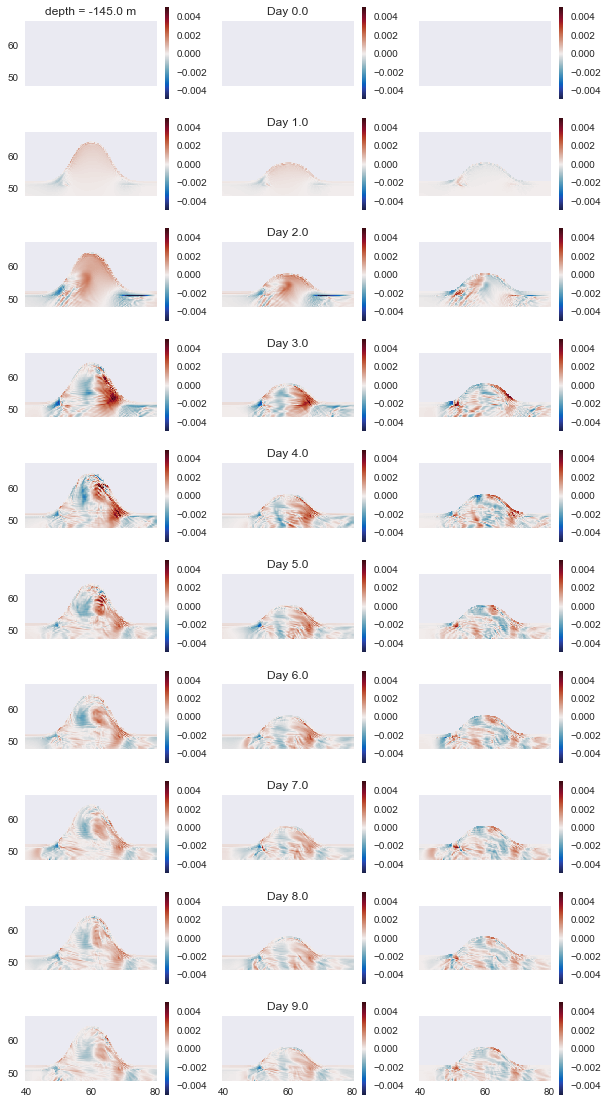

In [9]:
y_slice = slice(200,300)
x_slice = slice(80,280)
zlev = 29

fig,ax = plt.subplots(10,3, figsize=(10,20), sharey=True, sharex = True)

for ii in range(10):
    
    tt = ii*2
    
    long_w = np.ma.masked_equal(staLon.W.isel(Y=y_slice, X=x_slice, Zl=zlev, T=tt), 0.0)
    bark_w = np.ma.masked_equal(staBar.W.isel(Y=y_slice, X=x_slice, Zl=zlev, T=tt), 0.0)
    X = ptrBar.X.isel(X=x_slice)/1000
    Y = ptrBar.Y.isel(Y=y_slice)/1000
    
    pc0 = ax[ii,0].pcolor(X,Y,long_w, vmax=0.005, vmin=-0.005, cmap=cmo.cm.balance)
    plt.colorbar(pc0
                 , ax=ax[ii,0])
    pc1 = ax[ii,1].pcolor(X,Y,bark_w, vmax=0.005, vmin=-0.005, cmap=cmo.cm.balance)
    plt.colorbar(pc1, ax=ax[ii,1])
    pc2 = ax[ii,2].pcolor(X,Y,long_w-bark_w, vmax=0.005, vmin=-0.005, cmap=cmo.cm.balance)
    plt.colorbar(pc2, ax=ax[ii,2])
    
    ax[ii,1].set_title('Day %0.1f' %(tt/2.0))
    ax[ii,0].set_aspect(1)
    ax[ii,1].set_aspect(1)
    ax[ii,2].set_aspect(1)
    
ax[0,0].set_title('depth = %1.1f m' %(staLon.Zl.isel(Zl=zlev)))

Text(0.5,1,'depth = -155.0 m')

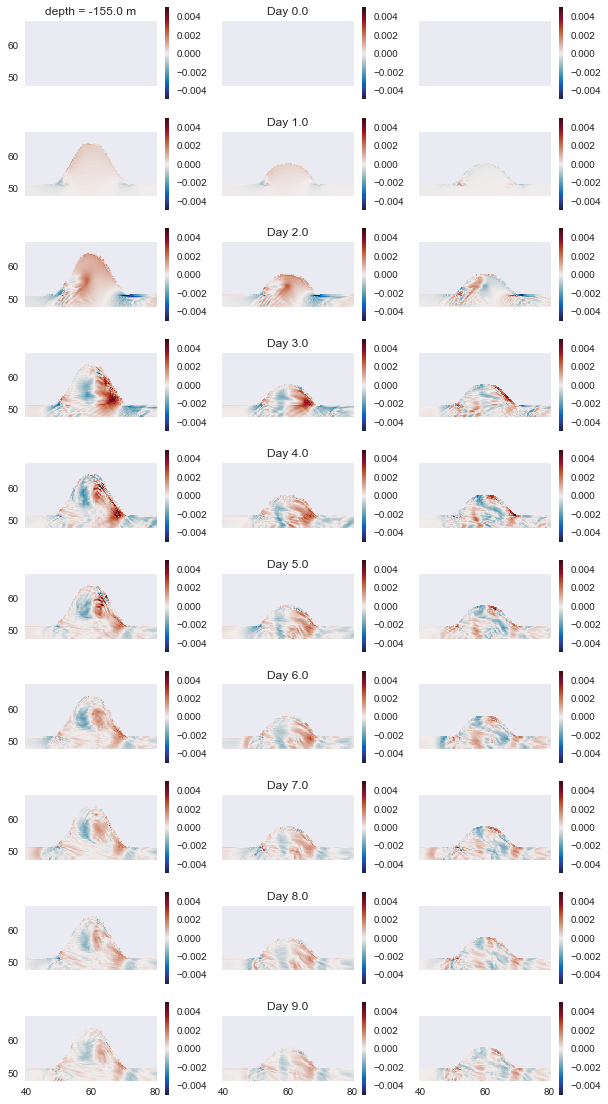

In [10]:
y_slice = slice(200,300)
x_slice = slice(80,280)
zlev = 31

fig,ax = plt.subplots(10,3, figsize=(10,20), sharey=True, sharex = True)

for ii in range(10):
    
    tt = ii*2
    
    long_w = np.ma.masked_equal(staLon.W.isel(Y=y_slice, X=x_slice, Zl=zlev, T=tt), 0.0)
    bark_w = np.ma.masked_equal(staBar.W.isel(Y=y_slice, X=x_slice, Zl=zlev, T=tt), 0.0)
    X = ptrBar.X.isel(X=x_slice)/1000
    Y = ptrBar.Y.isel(Y=y_slice)/1000
    
    pc0 = ax[ii,0].pcolor(X,Y,long_w, vmax=0.005, vmin=-0.005, cmap=cmo.cm.balance)
    plt.colorbar(pc0
                 , ax=ax[ii,0])
    pc1 = ax[ii,1].pcolor(X,Y,bark_w, vmax=0.005, vmin=-0.005, cmap=cmo.cm.balance)
    plt.colorbar(pc1, ax=ax[ii,1])
    pc2 = ax[ii,2].pcolor(X,Y,long_w-bark_w, vmax=0.005, vmin=-0.005, cmap=cmo.cm.balance)
    plt.colorbar(pc2, ax=ax[ii,2])
    
    ax[ii,1].set_title('Day %0.1f' %(tt/2.0))
    ax[ii,0].set_aspect(1)
    ax[ii,1].set_aspect(1)
    ax[ii,2].set_aspect(1)
    
ax[0,0].set_title('depth = %1.1f m' %(staLon.Zl.isel(Zl=zlev)))


Text(0.5,1,'depth = -165.0 m')

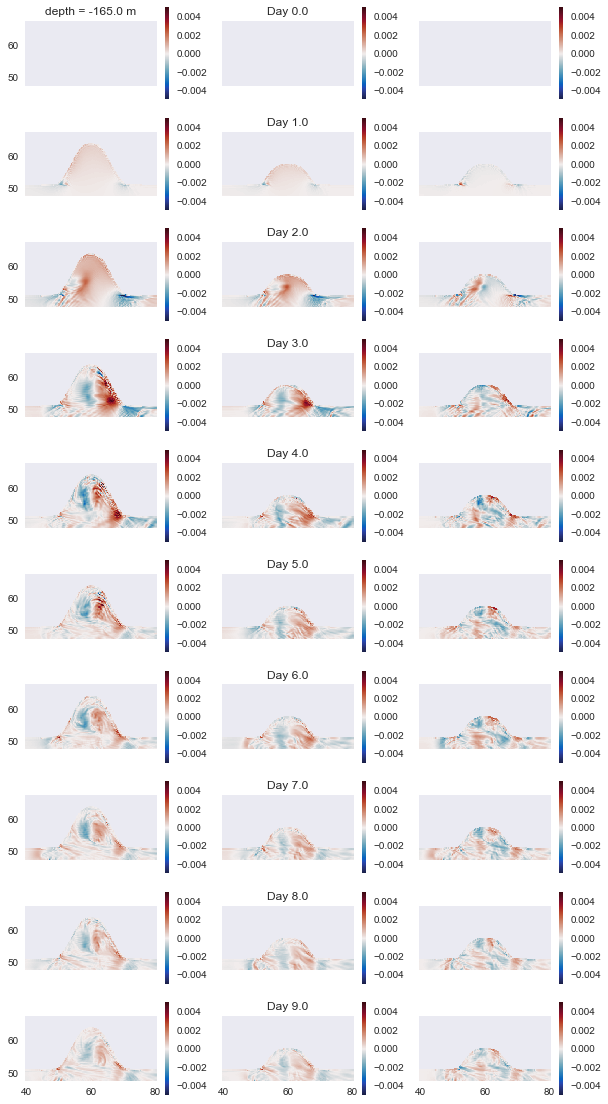

In [11]:
y_slice = slice(200,300)
x_slice = slice(80,280)
zlev = 33

fig,ax = plt.subplots(10,3, figsize=(10,20), sharey=True, sharex = True)

for ii in range(10):
    
    tt = ii*2
    
    long_w = np.ma.masked_equal(staLon.W.isel(Y=y_slice, X=x_slice, Zl=zlev, T=tt), 0.0)
    bark_w = np.ma.masked_equal(staBar.W.isel(Y=y_slice, X=x_slice, Zl=zlev, T=tt), 0.0)
    X = ptrBar.X.isel(X=x_slice)/1000
    Y = ptrBar.Y.isel(Y=y_slice)/1000
    
    pc0 = ax[ii,0].pcolor(X,Y,long_w, vmax=0.005, vmin=-0.005, cmap=cmo.cm.balance)
    plt.colorbar(pc0
                 , ax=ax[ii,0])
    pc1 = ax[ii,1].pcolor(X,Y,bark_w, vmax=0.005, vmin=-0.005, cmap=cmo.cm.balance)
    plt.colorbar(pc1, ax=ax[ii,1])
    pc2 = ax[ii,2].pcolor(X,Y,long_w-bark_w, vmax=0.005, vmin=-0.005, cmap=cmo.cm.balance)
    plt.colorbar(pc2, ax=ax[ii,2])
    
    ax[ii,1].set_title('Day %0.1f' %(tt/2.0))
    ax[ii,0].set_aspect(1)
    ax[ii,1].set_aspect(1)
    ax[ii,2].set_aspect(1)
    
ax[0,0].set_title('depth = %1.1f m' %(staLon.Zl.isel(Zl=zlev)))

### Alongshore velocities

Text(0.5,1,'alongshore dist = 48.4 km')

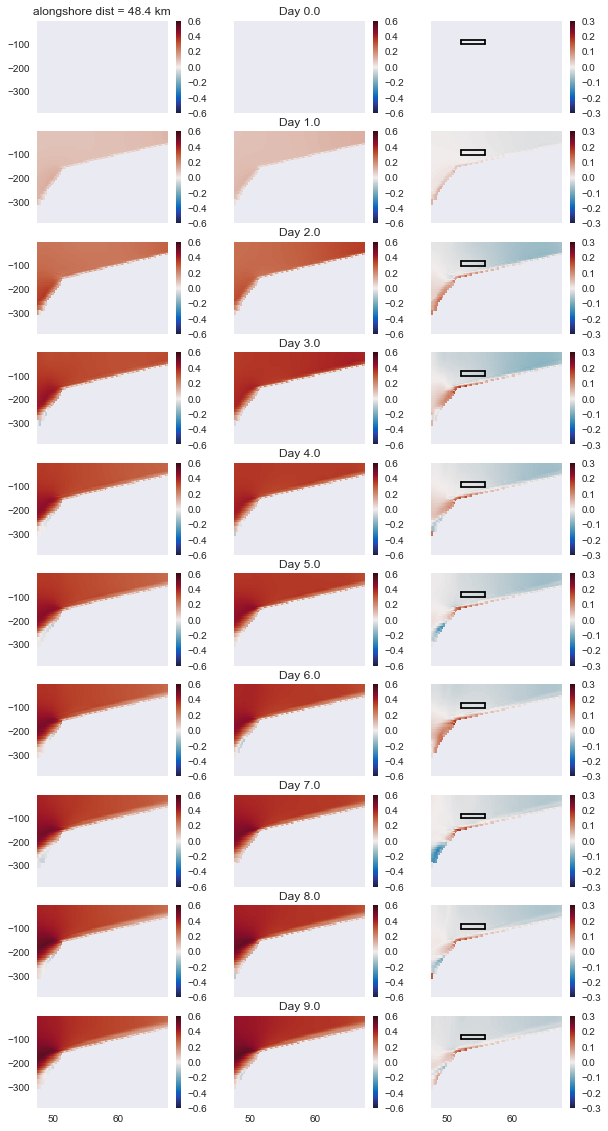

In [12]:
y_slice = slice(200,300)
x_ind = 110
z_slice = slice(0,50)

# Box where U incoming is calclulated
box_Uin_z = slice(16,21)
box_Uin_y = slice(230,251)
nox_Uin_x = 110

fig,ax = plt.subplots(10,3, figsize=(10,20), sharey=True, sharex = True)

for ii in range(10):
    
    tt = ii*2
    
    long_u = np.ma.masked_equal(staLon.U.isel(Y=y_slice, Xp1=x_ind, Z=z_slice, T=tt), 0.0)
    bark_u = np.ma.masked_equal(staBar.U.isel(Y=y_slice, Xp1=x_ind, Z=z_slice, T=tt), 0.0)
    X = staBar.X.isel(X=x_ind)/1000
    Y = staBar.Y.isel(Y=y_slice)/1000
    Z = staBar.Z.isel(Z=z_slice)
    
    pc0 = ax[ii,0].pcolor(Y,Z,long_u, vmax=0.6, vmin=-0.6, cmap=cmo.cm.balance)
    plt.colorbar(pc0, ax=ax[ii,0])
    pc1 = ax[ii,1].pcolor(Y,Z,bark_u, vmax=0.6, vmin=-0.6, cmap=cmo.cm.balance)
    plt.colorbar(pc1, ax=ax[ii,1])
    pc2 = ax[ii,2].pcolor(Y,Z,long_u-bark_u, vmax=0.3, vmin=-0.3, cmap=cmo.cm.balance)
    plt.colorbar(pc2, ax=ax[ii,2])
    
    y_ubox = staBar.Y.isel(Y=box_Uin_y).data/1000
    z_ubox = staBar.Z.isel(Z=box_Uin_z).data
    ax[ii,2].plot(y_ubox[0]*np.ones(len(z_ubox)), z_ubox,'-k')
    ax[ii,2].plot(y_ubox[-1]*np.ones(len(z_ubox)), z_ubox,'-k')
    ax[ii,2].plot(y_ubox, z_ubox[-1]*np.ones(len(y_ubox)),'-k')
    ax[ii,2].plot(y_ubox, z_ubox[0]*np.ones(len(y_ubox)),'-k')
    
    ax[ii,1].set_title('Day %0.1f' %(tt/2.0))
    
ax[0,0].set_title('alongshore dist = %1.1f km' %(ptrLon.X.isel(X=x_ind)/1000))

Text(0.5,1,'alongshore dist = 60.1 km')

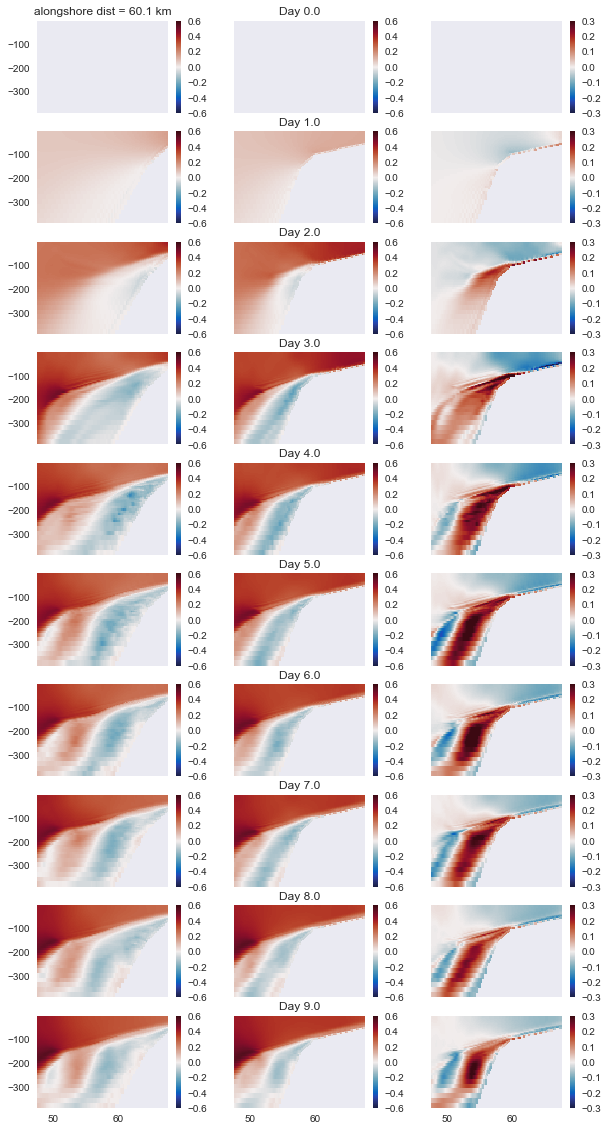

In [13]:
y_slice = slice(200,300)
x_ind = 180
z_slice = slice(0,50)


fig,ax = plt.subplots(10,3, figsize=(10,20), sharey=True, sharex = True)

for ii in range(10):
    
    tt = ii*2
    
    long_u = np.ma.masked_equal(staLon.U.isel(Y=y_slice, Xp1=x_ind, Z=z_slice, T=tt), 0.0)
    bark_u = np.ma.masked_equal(staBar.U.isel(Y=y_slice, Xp1=x_ind, Z=z_slice, T=tt), 0.0)
    X = staBar.X.isel(X=x_ind)/1000
    Y = staBar.Y.isel(Y=y_slice)/1000
    Z = staBar.Z.isel(Z=z_slice)
    
    pc0 = ax[ii,0].pcolor(Y,Z,long_u, vmax=0.6, vmin=-0.6, cmap=cmo.cm.balance)
    plt.colorbar(pc0, ax=ax[ii,0])
    pc1 = ax[ii,1].pcolor(Y,Z,bark_u, vmax=0.6, vmin=-0.6, cmap=cmo.cm.balance)
    plt.colorbar(pc1, ax=ax[ii,1])
    pc2 = ax[ii,2].pcolor(Y,Z,long_u-bark_u, vmax=0.3, vmin=-0.3, cmap=cmo.cm.balance)
    plt.colorbar(pc2, ax=ax[ii,2])
      
    ax[ii,1].set_title('Day %0.1f' %(tt/2.0))
    
ax[0,0].set_title('alongshore dist = %1.1f km' %(ptrLon.X.isel(X=x_ind)/1000))

### Tracer and N profiles at UwH station 
The UwH station for the long 2x canyon is at x[200], y[289] while the one for Barkley-like canyon is at x[200], y[261]
 adn the one for the lon 1.5x canyon is at x[200], y[276].

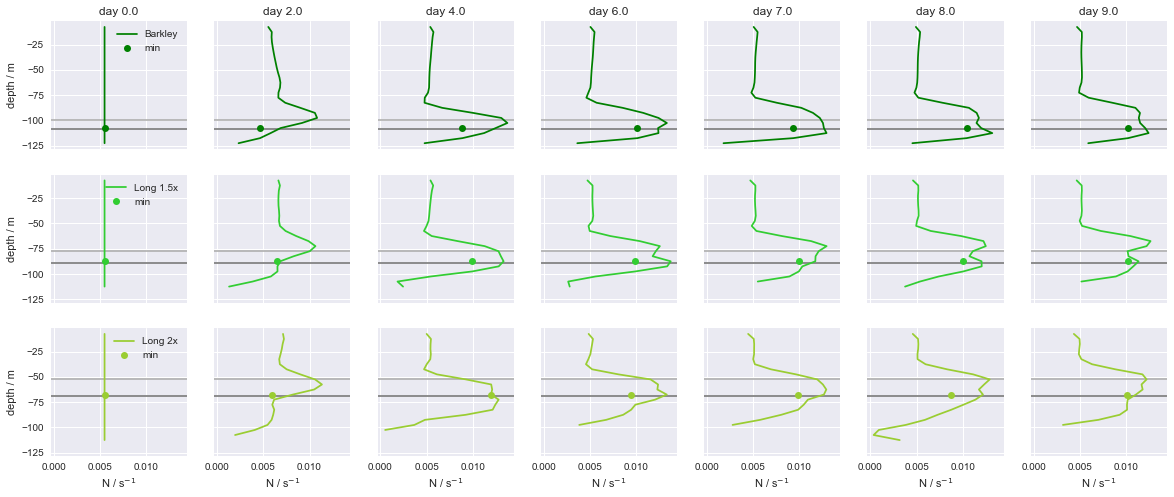

In [6]:
t=6.5
stname = 'UwH' #Station downstream head of canyon

keys2 = ['N_tt00','N_tt04','N_tt08','N_tt12','N_tt14','N_tt16','N_tt18']
times = [0,2,4,6,7,8,9]

fig,ax = plt.subplots(3,7, figsize=(20,8), sharey=True, sharex = True)

filename1 = ('/ocean/kramosmu/OutputAnalysis/outputanalysisnotebooks/results/metricsDataFrames/N_CNTDIFF_run38_UwH.csv')
df_Bar = pd.read_csv(filename1)

filename2 = ('/ocean/kramosmu/OutputAnalysis/outputanalysisnotebooks/results/metricsDataFrames/N_LONGER_CNY_run01_UwH.csv')
df_Lon = pd.read_csv(filename2)

filename3 = ('/ocean/kramosmu/OutputAnalysis/outputanalysisnotebooks/results/metricsDataFrames/N_LONGER_CNY2_run01_UwH.csv')
df_Lon2 = pd.read_csv(filename3)

Z = staBar.Z[:]

for key, ii in zip(keys2, range(len(keys2))):
    
    N_prof_Bar = df_Bar[key][:] 
    N_prof_Lon = df_Lon[key][:] 
    N_prof_Lon2 = df_Lon2[key][:] 
    
    ax[0,ii].axhline(-108.1, color='0.5')
    ax[0,ii].axhline(-99.7, color='0.7')
    ax[0,ii].plot(N_prof_Bar, Z[1:-1], 'g', label='Barkley')
    ax[0,ii].plot(np.min(N_prof_Bar[20:23]), Z[21], 'go',label='min')
    ax[0,ii].set_title('day %1.1f' %times[ii])
    
    ax[1,ii].axhline(-89.1, color='0.5')
    ax[1,ii].axhline(-77.4, color='0.7')
    ax[1,ii].plot(N_prof_Lon2, Z[1:-1],'limegreen', label='Long 1.5x')
    ax[1,ii].plot(np.min(N_prof_Lon2[16:19]), Z[17], 'o',color='limegreen', label='min')
    
    ax[2,ii].axhline(-69.1, color='0.5')
    ax[2,ii].axhline(-52.3, color='0.7')
    ax[2,ii].plot(N_prof_Lon, Z[1:-1],'yellowgreen', label='Long 2x')
    ax[2,ii].plot(np.min(N_prof_Lon[12:16]), Z[13], 'o',color='yellowgreen', label='min')
    ax[2,ii].set_xlabel('N / s$^{-1}$')

ax[2,0].set_ylabel('depth / m')
ax[1,0].set_ylabel('depth / m')
ax[0,0].set_ylabel('depth / m')
    
ax[1,0].legend(loc=1)
ax[0,0].legend(loc=0)
ax[2,0].legend(loc=0)
    




Co at rim depth 5.78
Co at rim depth 4.34
Co at rim depth 5.06


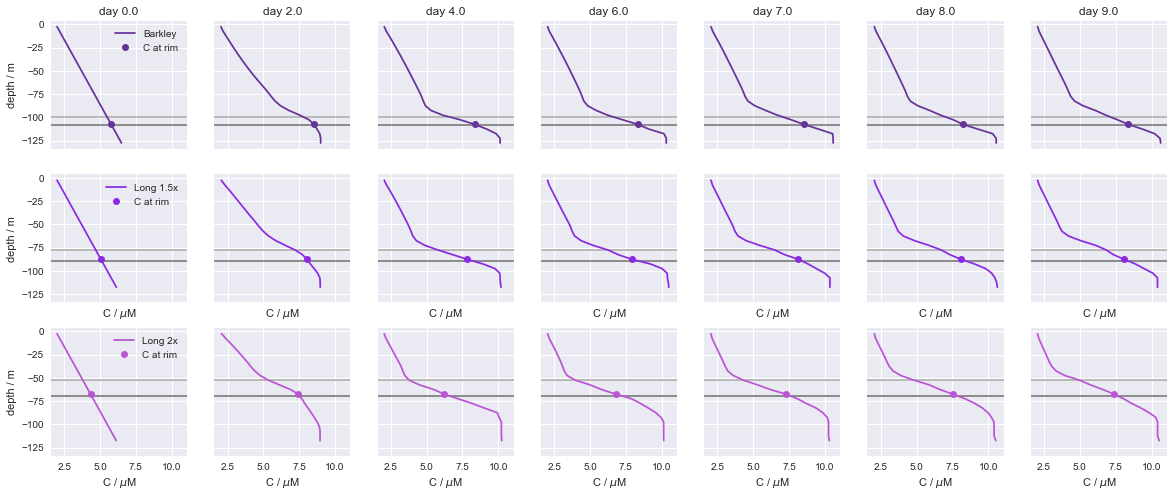

In [7]:
t=6.5
stname = 'UwH' #Station downstream head of canyon

keys2 = ['Tr_profile_tt00','Tr_profile_tt04','Tr_profile_tt08','Tr_profile_tt12',
         'Tr_profile_tt14','Tr_profile_tt16','Tr_profile_tt18']
times = [0,2,4,6,7,8,9]

fig,ax = plt.subplots(3,7, figsize=(20,8), sharey=True, sharex = True)

filename1 = ('/ocean/kramosmu/OutputAnalysis/outputanalysisnotebooks/results/metricsDataFrames/Tr1_profile_CNTDIFF_run38_UwH.csv')
df_Bar = pd.read_csv(filename1)

filename2 = ('/ocean/kramosmu/OutputAnalysis/outputanalysisnotebooks/results/metricsDataFrames/Tr1_profile_LONGER_CNY_run01_UwH.csv')
df_Lon = pd.read_csv(filename2)

filename3 = ('/ocean/kramosmu/OutputAnalysis/outputanalysisnotebooks/results/metricsDataFrames/Tr1_profile_LONGER_CNY2_run01_UwH.csv')
df_Lon2 = pd.read_csv(filename3)

Z = staBar.Z[:]

for key, ii in zip(keys2, range(len(keys2))):
    
    prof_Bar = df_Bar[key][:] 
    prof_Lon = df_Lon[key][:] 
    prof_Lon2 = df_Lon2[key][:] 
    
    if key == 'Tr_profile_tt00': 
        print('Co at rim depth %1.2f' %prof_Bar[21])
        print('Co at rim depth %1.2f' %prof_Lon[13])
        print('Co at rim depth %1.2f' %prof_Lon[17])
    
    ax[0,ii].axhline(-108.1, color='0.5')
    ax[0,ii].axhline(-99.7, color='0.7')
    ax[0,ii].plot(prof_Bar, Z[:], color='rebeccapurple', label='Barkley')
    ax[0,ii].plot(prof_Bar[21], Z[21], 'o',color='rebeccapurple', label='C at rim')
    ax[0,ii].set_title('day %1.1f' %times[ii])
    
    ax[1,ii].axhline(-89.1, color='0.5')
    ax[1,ii].axhline(-77.4, color='0.7')
    ax[1,ii].plot(prof_Lon2, Z[:],'blueviolet', label='Long 1.5x')
    ax[1,ii].set_xlabel('C / $\mu$M')
    ax[1,ii].plot(prof_Lon2[17], Z[17], 'o', color='blueviolet', label='C at rim')
    
    ax[2,ii].axhline(-69.1, color='0.5')
    ax[2,ii].axhline(-52.3, color='0.7')
    ax[2,ii].plot(prof_Lon, Z[:],'mediumorchid', label='Long 2x')
    ax[2,ii].set_xlabel('C / $\mu$M')
    ax[2,ii].plot(prof_Lon[13], Z[13], 'o', color='mediumorchid', label='C at rim')
    
ax[1,0].set_ylabel('depth / m')
ax[0,0].set_ylabel('depth / m')
ax[2,0].set_ylabel('depth / m')

ax[1,0].legend(loc=0)
ax[0,0].legend(loc=0)
ax[2,0].legend(loc=0)


### Check that initial stratification is what I claim it is

In [8]:
# Information for all runs is stored in canyon_records.py
import os
import sys

lib_path = os.path.abspath('/ocean/kramosmu/OutputAnalysis/outputanalysisnotebooks/PythonScripts/Paper1Figures/') # Add absolute path to my python scripts
sys.path.append(lib_path)

import canyon_records 
records = canyon_records.main()

select_rec = [0,3,4,5,51,6,7]

for ii in select_rec:
    print(ii,records[ii].name)

0 CNTDIFF_run38
3 CNTDIFF_run45
4 CNTDIFF_run73
5 CNTDIFF_run75
51 CNTDIFF_run81
6 CNTDIFF_run79
7 CNTDIFF_run67


In [9]:
key ='N_tt00'
stname = 'UwH' # Station at downstream head side of canyon

for ind in select_rec:
    
    filename1 = ('/ocean/kramosmu/OutputAnalysis/outputanalysisnotebooks/results/metricsDataFrames/N_%s_%s.csv' %
                 (records[ind].name,stname))
    df = pd.read_csv(filename1)
         
    records[ind].N_mod = df[key][10] 
    print(records[ind].name, records[ind].N_mod)
    

CNTDIFF_run38 0.00549634212114
CNTDIFF_run45 0.00632931903329
CNTDIFF_run73 0.00743280531345
CNTDIFF_run75 0.00455888424306
CNTDIFF_run81 0.00466567726433
CNTDIFF_run79 0.00494603765513
CNTDIFF_run67 0.00549634212114


It is ok.

### Check the timing of HCW

In [135]:
file1 = ('/data/kramosmu/results/TracerExperiments/CNTDIFF/HCW_TrMass_CNTDIFFrun38.csv')
dfcan1 = pd.read_csv(file1)
HCW = dfcan1['HCW']
TrMass = dfcan1['TrMassHCW']

In [136]:
file2 = ('/data/kramosmu/results/TracerExperiments/LONGER_CNY/HCW_TrMass_LONGER_CNYrun01.csv')
dfcan2 = pd.read_csv(file2)
HCW_long = dfcan2['HCW']
TrMass_long = dfcan2['TrMassHCW']

In [137]:
file3 = ('/data/kramosmu/results/TracerExperiments/LONGER_CNY2/HCW_TrMass_LONGER_CNY2run01.csv')
dfcan3 = pd.read_csv(file3)
HCW_long2 = dfcan3['HCW']
TrMass_long2 = dfcan3['TrMassHCW']

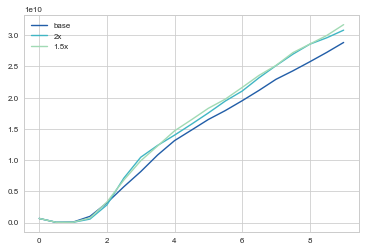

In [138]:
fig, ax = plt.subplots(1,1, figsize=(6,4))
ax.plot(np.arange(19)/2,HCW, '-', color='#225ea8', label ='base')
ax.plot(np.arange(19)/2,HCW_long, '-', color='#41b6c4', label = '2x')
ax.plot(np.arange(19)/2,HCW_long2, '-', color='#a1dab4', label = '1.5x')
ax.legend(loc=0)

### Vertical water flux

In [ ]:
y_slice = slice(227,300)
x_slice = slice(120,240)
zlev = 29

fig,ax = plt.subplots(1,2, figsize=(6,3), sharey=True, sharex = True)
long_w = np.ma.masked_equal(staLon.W.isel(Y=y_slice, X=x_slice, Zl=zlev, T=14), 0.0)
bark_w = np.ma.masked_equal(staBar.W.isel(Y=y_slice, X=x_slice, Zl=zlev, T=14), 0.0)
X = ptrBar.X.isel(X=x_slice)/1000
Y = ptrBar.Y.isel(Y=y_slice)/1000
    
pc0 = ax[0].pcolor(X,Y,long_w, vmax=0.005, vmin=-0.005, cmap=cmo.cm.balance)
plt.colorbar(pc0, ax=ax[0])
pc1 = ax[1].pcolor(X,Y,bark_w, vmax=0.005, vmin=-0.005, cmap=cmo.cm.balance)
plt.colorbar(pc1, ax=ax[1])
    
ax[1].set_title('Day %0.1f' %(tt/2.0))
ax[0].set_aspect(1)
ax[1].set_aspect(1)
    
ax[0].set_title('depth = %1.1f m' %(staLon.Zl.isel(Zl=zlev)))

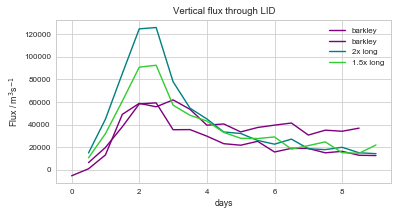

In [134]:
sns.set_style('whitegrid')
long_w = np.ma.masked_equal(staLon.W.isel(Y=y_slice, X=x_slice, Zl=zlev), 0.0)
bark_w = np.ma.masked_equal(staBar.W.isel(Y=y_slice, X=x_slice, Zl=zlev), 0.0)
long2_w = np.ma.masked_equal(staLon2.W.isel(Y=y_slice, X=x_slice, Zl=zlev), 0.0)


w_flux_bark = np.sum(np.sum(bark_w*rA[y_slice,x_slice], axis=1), axis=1)
w_flux_long = np.sum(np.sum(long_w*rA[y_slice,x_slice], axis=1), axis=1)
w_flux_long2 = np.sum(np.sum(long2_w*rA[y_slice,x_slice], axis=1), axis=1)

fig,ax = plt.subplots(1,1, figsize=(6,3))

ax.plot(np.arange(19)/2,w_flux_bark, color='purple', label='barkley')
ax.plot(np.arange(18)/2,(np.array(HCW[1:])-np.array(HCW[0:-1]))/(12*3600), color='purple', label='barkley')

ax.plot(np.arange(19)/2,w_flux_long, color='teal',label= '2x long')
ax.plot(np.arange(19)/2,w_flux_long2, color='limegreen',label= '1.5x long')
    
ax.set_title('Vertical flux through LID')
ax.set_xlabel('days')
ax.set_ylabel('Flux / m$^3$s$^{-1}$')
ax.legend(loc=0)

In [130]:
np.array(HCW[0:-1])-np.array(HCW[1:])

array([  2.32823161e+08,  -3.48734419e+07,  -5.65149006e+08,
        -2.11775331e+09,  -2.53802995e+09,  -2.40660032e+09,
        -2.67046901e+09,  -2.31047183e+09,  -1.70343258e+09,
        -1.74953350e+09,  -1.44523726e+09,  -1.61485501e+09,
        -1.70483377e+09,  -1.78530714e+09,  -1.32506532e+09,
        -1.51205006e+09,  -1.47086554e+09,  -1.58957597e+09])

### Pictures for Reviewer 2

In [60]:
sns.set_context('paper')
sns.set_style('dark')

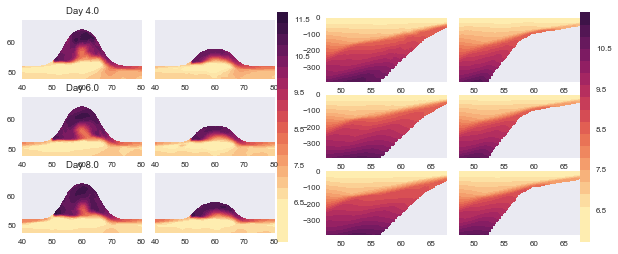

In [78]:
y_slice = slice(200,300)
x_slice = slice(80,280)
zlev = 29

y_slice1 = slice(200,300)
x_ind = 200
z_slice = slice(0,50)

fig,ax = plt.subplots(3,4, figsize=(10,4))

gs = gspec.GridSpec(1, 2, wspace=0.2)

gs0 = gspec.GridSpecFromSubplotSpec(3, 2, subplot_spec=gs[0], wspace=0.1)
gs1 = gspec.GridSpecFromSubplotSpec(3, 2, subplot_spec=gs[1], wspace=0.1)

for ii,tt in zip(range(3), [8, 12, 16]) :
    
    ax0 = plt.subplot(gs0[ii,0])
    ax1 = plt.subplot(gs0[ii,1],yticks=[])
    ax2 = plt.subplot(gs1[ii,0])
    ax3 = plt.subplot(gs1[ii,1],yticks=[])

    long_tr1 = np.ma.masked_equal(ptrLon.Tr1.isel(Y=y_slice, X=x_slice, Z=zlev, T=tt), 0.0)
    bark_tr1 = np.ma.masked_equal(ptrBar.Tr1.isel(Y=y_slice, X=x_slice, Z=zlev, T=tt), 0.0)
    X = ptrBar.X.isel(X=x_slice)/1000
    Y = ptrBar.Y.isel(Y=y_slice)/1000
    
    pc0 = ax0.contourf(X,Y,long_tr1,20, vmax=11.5, vmin=6.5, cmap=cmo.cm.matter)
    pc1 = ax1.contourf(X,Y,bark_tr1,20, vmax=11.5, vmin=6.5, cmap=cmo.cm.matter)
    
    cbar_ax = fig.add_axes([0.48, 0.1, 0.015, 0.8])
    cb=fig.colorbar(pc0, cax=cbar_ax,ticks=[6.5,7.5,8.5,9.5,10.5,11.5],format='%.1f')
    
    long_tr1 = np.ma.masked_equal(ptrLon.Tr1.isel(Y=y_slice1, X=x_ind, Z=z_slice, T=tt), 0.0)
    bark_tr1 = np.ma.masked_equal(ptrBar.Tr1.isel(Y=y_slice1, X=x_ind, Z=z_slice, T=tt), 0.0)
    X = ptrBar.X.isel(X=x_ind)/1000
    Y = ptrBar.Y.isel(Y=y_slice1)/1000
    Z = ptrBar.Z.isel(Z=z_slice)
    
    pc2 = ax2.contourf(Y,Z,long_tr1,20, vmax=20, vmin=3.0, cmap=cmo.cm.matter)
    pc3 = ax3.contourf(Y,Z,bark_tr1,20, vmax=20, vmin=3.0, cmap=cmo.cm.matter)
    
    cbar_ax2 = fig.add_axes([0.9, 0.1, 0.015, 0.8])
    cb2=fig.colorbar(pc1, cax=cbar_ax2,ticks=[6.5,7.5,8.5,9.5,10.5,11.5],format='%.1f')
    
    ax0.set_title('Day %0.1f' %(tt/2.0))
    ax0.set_aspect(1)
    ax1.set_aspect(1)
    
ax0 = plt.subplot(gs0[ii,0])
plt.savefig('tracer_long_vs_short.eps', format='eps',bbox_inches='tight' )

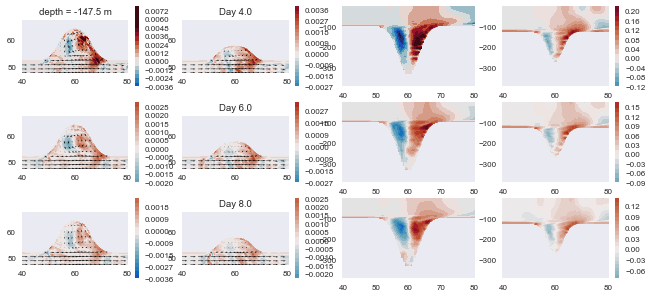

In [63]:
y_slice = slice(200,300)
x_slice = slice(80,280)
zlev = 29

x_slice1 = slice(120,240)
z_slice = slice(0,50)
y_ind = 250

fig,ax = plt.subplots(3,4, figsize=(11,5))

for ii,tt in zip(range(3), [8, 12, 16]) :
    
    Uuns,Vuns = rout.unstagger(staLon.U.isel(Z=zlev, T=tt),
                               staLon.V.isel(Z=zlev, T=tt))
    Uuns2,Vuns2 = rout.unstagger(staBar.U.isel(Z=zlev, T=tt),
                                 staBar.V.isel(Z=zlev, T=tt))
    long_w = np.ma.masked_equal(staLon.W.isel(Y=y_slice, X=x_slice, Zl=zlev, T=tt), 0.0)
    bark_w = np.ma.masked_equal(staBar.W.isel(Y=y_slice, X=x_slice, Zl=zlev, T=tt), 0.0)
    
    mask_long = np.ma.getmask(long_w)
    mask_bark = np.ma.getmask(bark_w)
    UU = np.ma.masked_array(Uuns[y_slice,x_slice], mask=mask_long)
    VV = np.ma.masked_array(Vuns[y_slice,x_slice], mask=mask_long)
   
    UU_bar = np.ma.masked_array(Uuns2[y_slice,x_slice], mask=mask_bark)
    VV_bar = np.ma.masked_array(Vuns2[y_slice,x_slice], mask=mask_bark)
   
    X = ptrBar.X.isel(X=x_slice)/1000
    Y = ptrBar.Y.isel(Y=y_slice)/1000
    Z = ptrBar.Z.isel(Z=z_slice)
   
    pc0 = ax[ii,0].contourf(X,Y,long_w,20, vmax=0.005, vmin=-0.005, cmap=cmo.cm.balance)
    plt.colorbar(pc0, ax=ax[ii,0])
    ax[ii,0].quiver(X[::10],Y[::10],UU[::10,::10],VV[::10, ::10])
    pc1 = ax[ii,1].contourf(X,Y,bark_w,20, vmax=0.005, vmin=-0.005, cmap=cmo.cm.balance)
    plt.colorbar(pc1, ax=ax[ii,1])
    ax[ii,1].quiver(X[::10],Y[::10],UU_bar[::10,::10],VV_bar[::10, ::10])
    
    long_v = np.ma.masked_equal(staLon.V.isel(Yp1=270, X=x_slice, Z=z_slice, T=tt), 0.0)
    bark_v = np.ma.masked_equal(staBar.V.isel(Yp1=250, X=x_slice, Z=z_slice, T=tt), 0.0)
    pc2 = ax[ii,2].contourf(X,Z,long_v,20, vmax=0.25, vmin=-0.25, cmap=cmo.cm.balance)
    pc3 = ax[ii,3].contourf(X,Z,bark_v,20, vmax=0.25, vmin=-0.25, cmap=cmo.cm.balance)
    plt.colorbar(pc3, ax=ax[ii,3])
    
    
    ax[ii,1].set_title('Day %0.1f' %(tt/2.0))
    ax[ii,0].set_aspect(1)
    ax[ii,1].set_aspect(1)
    
ax[0,0].set_title('depth = %1.1f m' %(ptrLon.Z.isel(Z=zlev)))
plt.savefig('speeds_long_vs_short.eps', format='eps',bbox_inches='tight')

Text(0.5,1,'depth = -145.0 m')

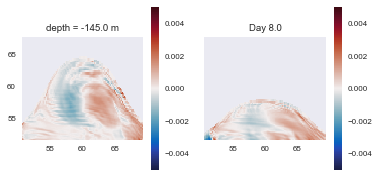

(99, 200)